<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# EDA on Car Sales Data


In [ ]:
pip install --upgrade nbformat

## Table of Contents

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Loading Data](#section4)<br>
  - 4.1 [Description of the Datasets](#section401)<br>
  - 4.2 [Pandas Profiling before Data Preprocessing](#section402)<br>
5. [Data Preprocessing](#section5)<br>
  - 5.1 [Duplicate Rows](#section501)<br>
  - 5.2 [Check Missing Values](#section502)<br>  
  - 5.3 [Pandas Profiling after Data Preprocessing](#section503)<br>
6. [Exploratory Data Analysis](#section6)<br>
  - 6.1 [Car Sales by Brand](#section601)<br>
  - 6.2 [Car Sales by Model](#section602)<br>
  - 6.3 [Sales by Body Type](#section603)<br>
  - 6.4 [Body Type vs Mileage](#section604)<br>
  - 6.5 [Body Type vs Car Fuel Type vs Mileage](#section605)<br>
  - 6.6 [Body vs engType vs Sales](#section606)<br>
  - 6.7 [Body vs Drive vs Sales](#section607)<br>
  - 6.8 [Drive vs Engine Type Vs Sales](#section608)<br>
  - 6.9 [Engine Type Vs Registration](#section609)<br>
  - 6.10 [Body Vs Price](#section610)<br>
  - 6.11 [Correlation analysis by pair plot](#section611)<br>
  - 6.12 [Correlation using Heat Map](#section612)<br>
7. [Conclusion](#section7)
8. [Actionable Insights](#section8)

<a id=section1></a>
# 1. Introduction

The **car sales** is dependent on multiple factors like brand name, model, year of purchase, body type, fuel, mileage, engine type, drive and price.

We are using using **Exploratory Data Analysis**:


- To find **patterns** in the new car sales data.


- To detrmine **relationship** in the data. 


- To identify important factors that attribute to new **car sales**. 


- To identify the **customer preferences** and their **purchase behavior** over a period of time.


The availability of **Car Sales Data** and **Technical Specification** provides better understanding of customers’ **purchase behavior** and **customer preferences**. In the increasingly competitive automobile industry, manufacturers have to create a decision-making framework that provides insight to decide on frequency and variety of product launches for fulfilling their ever changing customers’ need and retain their market share.


The process consists of the follwing steps:

1. Problem Statement


2. Data Preparation/Preprocessing


3. Exploratory Data Analysis


4. Conclusion and actionable insights

<center><img src = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/images/precision-marketing.jpg' width="700" height="500"></center>

The objective of the proposed analysis is to **help car manufacturers to identify the important factors** that impact consumer behavior and purchase decision. Identifying critical factors of the consumer buying pattern, preferences will help the car manufacturers in devising right strategy in planning future launches and gain market share. 

<a id=section2></a>
# 2. Problem statement

Analyzing the car sales data with Exploratory Data Analysis:  

- To find **patterns** in the new car sales data.


- To determine **relationship** in the data. 


- To identify important factors that attribute to new **car sales**. 


- To identify the **customer preferences** and their **purchase behavior** over a period of time.


<a id=section3></a>
# 3. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.precision', 2)               # To display values only upto two decimal places.
pd.options.display.max_columns = 20                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.


<a id=section4></a>
# 4. Loading Data

In [11]:
car_sales_data_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252') 
car_sales_data_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.00,vagon,91,nan,Other,yes,2013,E-Class,NaN


<a id=section401></a>
## 4.1 Description of the Dataset

The dataset consists of the information about different car sales in over a period of time. Various variables present in the dataset includes data of car, model, price, drive etc.

The dataset comprises of 9576 observations of 10 columns. Below is a table showing names of all the columns and their description.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| car                            | Car brand name                                                                              |
| model                          | Available car different Variants                                                            | 
| year                           | Purchasing Year                                                                            | 
| body                           | Body type-Hatchback, Sedan, Crossover etc                                                  |
| mileage                        | Car Mileage                                                                                |
| engV                           | Engine version                                                                            |
| engType                        | Car Fuel type - Petrol, Diesel, gas etc                                                    |
| drive                          | Wheel Drive Front, back                                                                    |
| registration                   | Check if the vechile is registered                                                          |
| price                          | Price of Car in $                                                                          |

In [12]:
car_sales_data_df.shape

(9576, 10)

In [13]:
car_sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


- **engV** has 434 missing values in the columns.
- **drive** has 511 missing values in the columns.

In [14]:
car_sales_data_df.describe()

,price,mileage,engV,year
count,9576.00,9576.00,9142.00,9576.00
mean,15633.32,138.86,2.65,2006.61
std,24106.52,98.63,5.93,7.07
min,0.00,0.00,0.10,1953.00
25%,4999.00,70.00,1.60,2004.00
50%,9200.00,128.00,2.00,2008.00
75%,16700.00,194.00,2.50,2012.00
max,547800.00,999.00,99.99,2016.00


- **min price** and **min mileage** has zero value which means the data has not been entered for this cars or have been recorded as zero due to non-availability.

<a id=section402></a>
## 4.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of the notebook. Use jupyter notebook file explorer and take a look at it and see what insights we can develop from it. 


- Or we can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [15]:
# To install pandas profiling
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\nirmal\anaconda3\lib\site-packages (2.9.0)


In [4]:
import pandas_profiling 

In [7]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = pandas_profiling.ProfileReport(car_sales_data_df)
profile.to_file(output_file="profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

# car_sales_data_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 945 (1%)

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Bool = 1


- **Car** has **87** distinct values.
- **Price** has **267** zero values. 
- **body** has **6** different types.
- **mileage** has **348** zero values and some small percentage of extreme values.
- **engV** has **434** missing values.
- **drive** has **511** missing values.


<a id=section5></a>
# 5. Data Preprocessing

<a id=section501></a>
## 5.1 Duplicate Rows

We'll start by checking the **duplicate** rows.

In [16]:
duplicates = car_sales_data_df[car_sales_data_df.duplicated(keep = 'first')]
print('There are {} duplicates out of total {} rows.'.format(duplicates.shape[0], car_sales_data_df.shape[0]))

There are 113 duplicates out of total 9576 rows.


In [17]:
duplicates.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.00,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.00,sedan,190,1.80,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.00,crossover,0,3.00,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.00,crossover,0,4.50,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.00,sedan,190,1.80,Gas,yes,2011,E-Class,rear


- From the above it can be infered that the duplicates are actual car sales data and can have same value for same car attributes
- We are not dropping any duplicate rows for the said reason from the data frame

<a id=section502></a>
## 5.2 Check Missing Values

In [18]:
car_sales_data_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

- Only two variables **engV** and **drive** has 434 and 511 missing values respectively.

In [19]:
car_sales_data_df[car_sales_data_df.engV.isnull()].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.00,vagon,91,nan,Other,yes,2013,E-Class,NaN
13,BMW,4700.00,sedan,200,nan,Petrol,yes,1996,316,rear
30,Nissan,13980.00,hatch,31,nan,Other,yes,2013,Leaf,front
31,Nissan,17300.00,hatch,24,nan,Other,yes,2013,Leaf,front
37,Audi,2850.00,sedan,260,nan,Other,no,1999,A6,NaN


In [20]:
car_sales_data_df[(car_sales_data_df.car =='Nissan') & (car_sales_data_df.body == 'hatch') & (car_sales_data_df.year == 2013) & (car_sales_data_df.model == 'Leaf')]

,car,price,body,mileage,engV,engType,registration,year,model,drive
30,Nissan,13980.00,hatch,31,nan,Other,yes,2013,Leaf,front
31,Nissan,17300.00,hatch,24,nan,Other,yes,2013,Leaf,front
41,Nissan,13275.00,hatch,12,nan,Other,yes,2013,Leaf,front
56,Nissan,17000.00,hatch,38,nan,Other,yes,2013,Leaf,front
247,Nissan,17500.00,hatch,62,nan,Other,yes,2013,Leaf,front
259,Nissan,16500.00,hatch,32,nan,Other,yes,2013,Leaf,front
339,Nissan,14999.00,hatch,31,1.00,Other,yes,2013,Leaf,front
403,Nissan,15700.00,hatch,22,0.11,Other,yes,2013,Leaf,front
553,Nissan,18000.00,hatch,45,nan,Other,yes,2013,Leaf,front
663,Nissan,14673.00,hatch,34,nan,Other,yes,2013,Leaf,front


- We did the missing value analysis to find if we can fill and substitute the NaN values for **engV** and **drive**.
- We came to a conclusion that there is no simmilarity in other parameters to conclude the missing value and substitute.
- We have decided to delete the rows with missing values in **engV** and **drive**.

In [21]:
car_sales_data_df.dropna(subset = ['engV','drive'], inplace = True)

In [22]:
car_sales_data_df.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [23]:
car_sales_data_df.describe()

,price,mileage,engV,year
count,8739.00,8739.00,8739.00,8739.00
mean,15733.54,140.10,2.59,2006.61
std,24252.90,97.89,5.42,6.97
min,0.00,0.00,0.10,1959.00
25%,5000.00,71.00,1.60,2004.00
50%,9250.00,130.00,2.00,2008.00
75%,16800.00,195.50,2.50,2012.00
max,547800.00,999.00,99.99,2016.00


In [24]:
df1= car_sales_data_df[(car_sales_data_df != 0).all(1)]
df1

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00,van,162,1.80,Diesel,yes,2012,B 180,front
5,Nissan,16600.00,crossover,83,2.00,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.00,crossover,140,2.00,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.00,vagon,150,1.60,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.00,crossover,180,3.50,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.00,sedan,150,3.50,Gas,yes,2008,ES 350,front


- I have dropped the rows where **price** and **mileage** is 0.
- My assumption is that **price** and **mileage** are important attributes to find corelation between other variables. Also substituting them with mean or mode doesn't make sense as the data is pertaining to combination of multiple attributes.

In [25]:
df1.describe()

,price,mileage,engV,year
count,8213.00,8213.00,8213.00,8213.00
mean,14491.71,146.61,2.56,2006.18
std,18664.01,95.46,5.37,6.82
min,259.35,1.00,0.10,1959.00
25%,5300.00,80.00,1.60,2004.00
50%,9200.00,134.00,2.00,2008.00
75%,16000.00,200.00,2.50,2011.00
max,300000.00,999.00,99.99,2016.00


- Now, the data is clean and we don't have any missing values in the dataset to deal with.

<a id=section503></a>
## 5.3 Pandas Profiling after Data Preprocessing

- Now we will perform **Pandas Profiling after Preprocessing** our dataset, and save the **output file** as __profiling_after_preprocessing.html__.

In [19]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = pandas_profiling.ProfileReport(df1)
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

# df1.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

After preprocessing the data, the dataset doesnot contain any missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. We can compare the two reports, i.e profiling_after_preprocessing.html and profiling_before_preprocessing.html to gain insights how data pre-processing has performed well.

In profiling_after_preprocessing.html report, following are the observations:

- Missing Cell(%) = 0.0%
- Number of Observations = 8213


<a id=section6></a>
# 6. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, wragling, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

In [20]:
# Importing the parallel_coordinates from pandas.plotting which will help in plotting the Parallel Coordinates.

from pandas.plotting import parallel_coordinates

In [21]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=d45e532f55003828890e7e6b99e9934e51a03eb20a2981decf5c53acc3f97e0d
  Stored in directory: c:\users\nirmal\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [22]:
# Install chart_studio, please use this command. 

!pip install chart-studio

<a id=section601></a>
## 6.1 Car Sales by Brand

We have identified the Top 20 brands being preferred by customers.

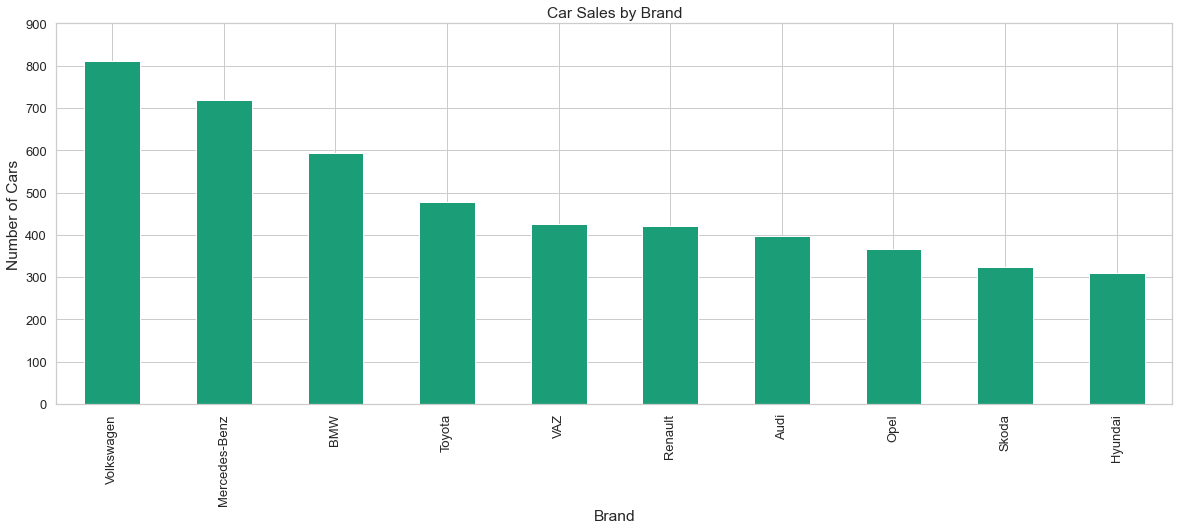

In [61]:
# brand wise new car sales

df1['car'].value_counts().sort_values(ascending = False)[:10].plot.bar(figsize=(20,7), colormap='Dark2', fontsize=13, yticks=np.arange(0, 1000, 100))
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Car Sales by Brand')
plt.savefig('sales_by_brand.png')

- Volswagen, Mercedes-Benz and BMW are the top-3 brands being preferred by customers

<a id=section602></a>
## 6.2  Car Sales by Model

This shows the most preferred models by customers.


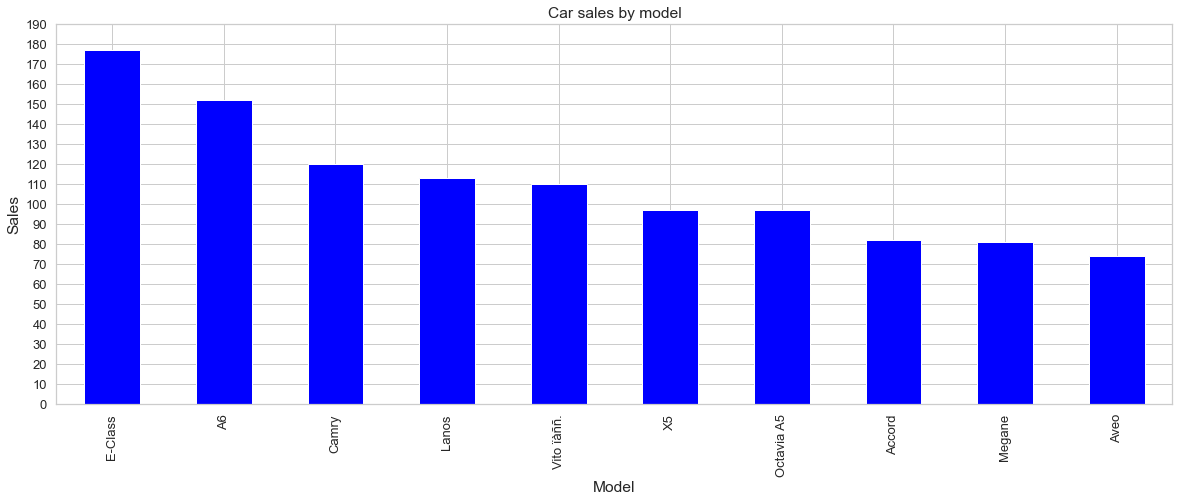

In [58]:
# Model wise car sales

df1['model'].value_counts().sort_values(ascending = False)[:10].plot.bar(figsize=(20,7), colormap='winter', fontsize=13, yticks=np.arange(0, 200, 10))
plt.xlabel('Model')
plt.ylabel('Sales')
plt.title('Car sales by model')
plt.savefig('sales_by_model.png')

- E-class (Mercedes-Benz), A6 (Audi) and Camry (Toyota) are the most selling models of the respective brand being preferred by customers. 

<a id=section603></a>
## 6.3 Sales by Body Type

<AxesSubplot:ylabel='body'>

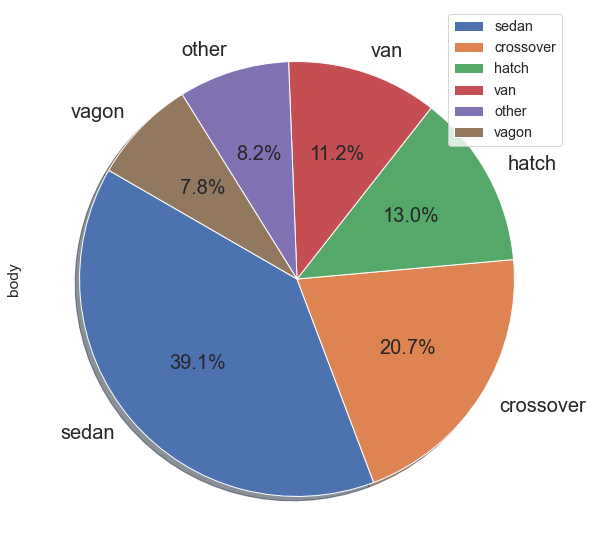

In [96]:
df1['body'].value_counts().plot(kind='pie', fontsize=20, autopct='%3.1f%%', shadow=True, startangle=150, figsize=(10,10), legend=True)

Text(0.5, 1.0, 'Sales by Body type')

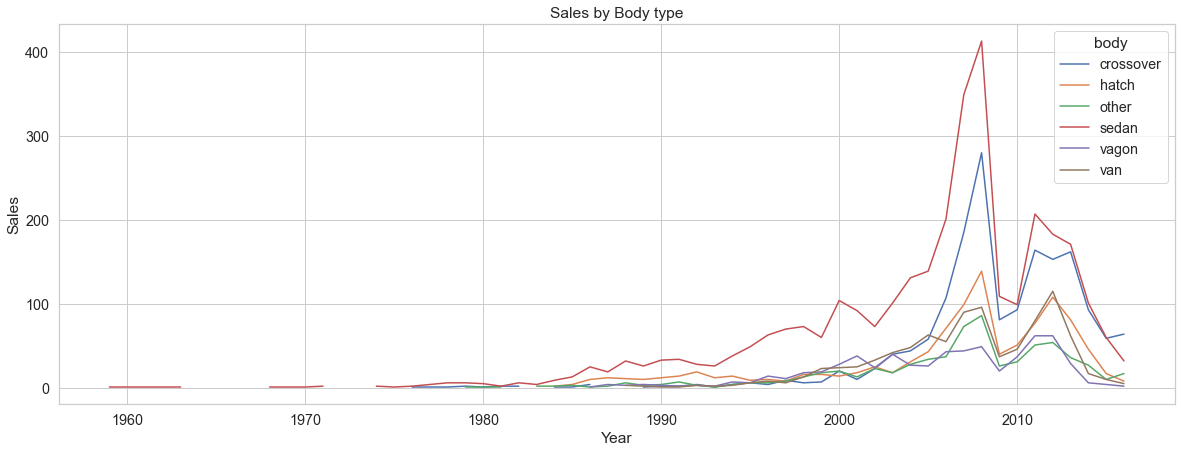

In [61]:
fig,ax = plt.subplots(figsize=(20,7))
df1.groupby(['year','body']).count()['car'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales by Body type')


- Sedan has been the top choice of customers followed by crossover
- In the past few years the trend of Crossover is catching up with sales more than the sedan in the recent year 
- Hatch and Van are the next popular choice

<a id=section604></a>
## 6.4 Body Type vs Mileage

In [101]:
df2 = df1.groupby('body')['mileage'].mean().reset_index()
df2

,body,mileage
0,crossover,113.49
1,hatch,118.96
2,other,143.56
3,sedan,153.79
4,vagon,179.82
5,van,193.92


Text(0.5, 1.0, 'Body vs Mileage')

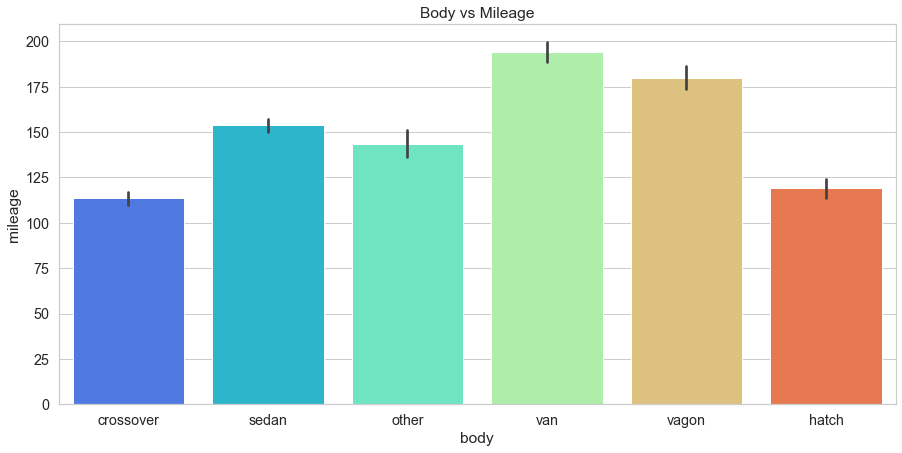

In [100]:
plt.figure(figsize=(15,7))
sns.barplot(data = df1, x = 'body', y = 'mileage', palette = 'rainbow')

plt.title('Body vs Mileage')

 - Best mileage is being offered by van and vagon
 - Sedan, Crossover and Hatch has lower mileage but still are the top three choice
 - We can infer mileage has less impact on customer choice in buying decision

<a id=section605></a>
## 6.5 Body Type vs Car Fuel Type vs Mileage


In [111]:
df3 = df1.groupby(['body','engType']).mean()['mileage'].reset_index()
df3

,body,engType,mileage
0,crossover,Diesel,112.21
1,crossover,Gas,142.73
2,crossover,Other,109.80
3,crossover,Petrol,98.47
4,hatch,Diesel,141.66
5,hatch,Gas,151.49
6,hatch,Other,93.56
7,hatch,Petrol,109.11
8,other,Diesel,186.49
9,other,Gas,170.95


<Figure size 432x288 with 0 Axes>

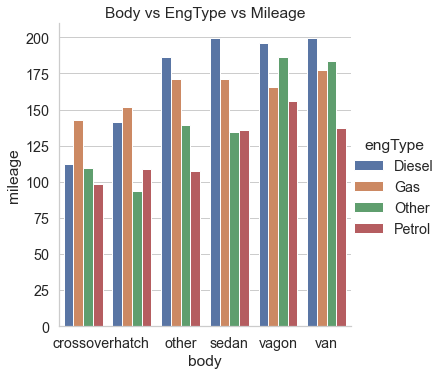

In [123]:
plt.figure()
sns.factorplot(x = 'body', y='mileage', hue = 'engType', data=df3, kind='bar')
plt.title('Body vs EngType vs Mileage')
plt.show()

- Diesel vehicle have more mileage followed by Gas and Other.
- Petrol Vehicles have the least mileage

<a id=section606></a>
## 6.6 Body vs engType vs Sales


In [125]:
df4 = df1.groupby(['body','engType']).count()['car'].reset_index()
df4

,body,engType,car
0,crossover,Diesel,571
1,crossover,Gas,393
2,crossover,Other,25
3,crossover,Petrol,710
4,hatch,Diesel,116
5,hatch,Gas,178
6,hatch,Other,52
7,hatch,Petrol,721
8,other,Diesel,239
9,other,Gas,77


<Figure size 432x288 with 0 Axes>

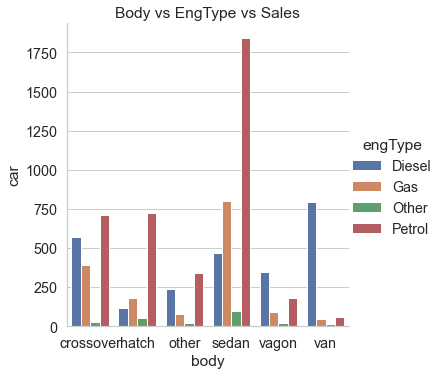

In [127]:
plt.figure()
sns.factorplot(x = 'body', y='car', hue = 'engType', data=df4, kind='bar')
plt.title('Body vs EngType vs Sales')
plt.show()

- Petrol Cars are the most preferred cars irrespective of poor mileage we have seen in the above analysis. It could be because it is a cleaner fuel and engine technology are less expensive
- Gas is the second preferred fuel
- Diesel is preferred for bigger vehicles where might be torque requirement is more like van, vagon and even crossover to certain extent

<a id=section607></a>
## 6.7 Body vs Drive vs Sales

In [155]:
df5 = df1.groupby(['body','drive']).count()['car'].reset_index()
df5

,body,drive,car
0,crossover,front,111
1,crossover,full,1581
2,crossover,rear,7
3,hatch,front,1014
4,hatch,full,22
5,hatch,rear,31
6,other,front,318
7,other,full,142
8,other,rear,217
9,sedan,front,2134


<Figure size 432x288 with 0 Axes>

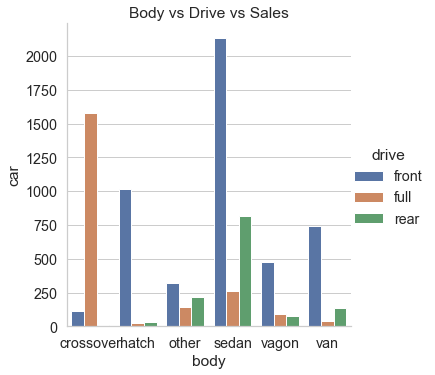

In [157]:
plt.figure()
sns.factorplot(x = 'body', y='car', hue = 'drive', data=df5, kind='bar')
plt.title('Body vs Drive vs Sales')
plt.show()

-  Front wheel drive is the most preferred technology when it comes to normal city driving
-  Full Wheel Drive (FWD) or All Wheel Drive (AWD) is preferred when it comes to crossover cars
-  Customers are looking for performance when they chose to buy crossovers

<a id=section608></a>
## 6.8 Drive vs Engine Type Vs Sales

In [26]:
df8 = df1.groupby(['engType','drive']).count()['car'].reset_index()
df8

,engType,drive,car
0,Diesel,front,1384
1,Diesel,full,724
2,Diesel,rear,431
3,Gas,front,929
4,Gas,full,441
5,Gas,rear,215
6,Other,front,151
7,Other,full,43
8,Other,rear,38
9,Petrol,front,2331


<Figure size 432x288 with 0 Axes>

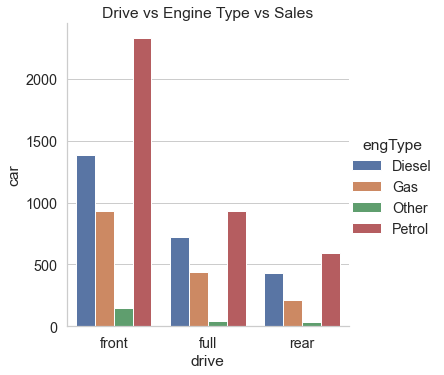

In [27]:
plt.figure()
sns.factorplot(x = 'drive', y='car', hue = 'engType', data=df8, kind='bar')
plt.title('Drive vs Engine Type vs Sales')
plt.show()

- Similar trend in the choice of fuel across various drive options.
- Petrol is most preferred followed Diesel and Gas.
- Petrol front wheel drive followed by Diesel front wheel drive is the most preferred.

<a id=section609></a>
## 6.9 Engine Type Vs Registration

Text(0.5, 1.0, 'Registration vs Non-Registraion')

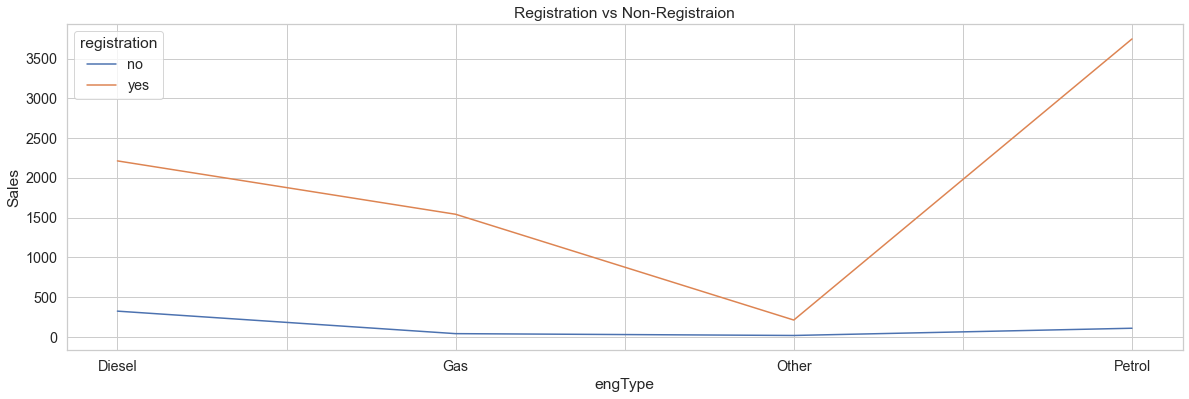

In [51]:
fig,ax = plt.subplots(figsize=(20,6))
df1.groupby(['engType','registration']).count()['car'].unstack().plot(ax=ax)
ax.set_xlabel('engType')
ax.set_ylabel('Sales')
ax.set_title('Registration vs Non-Registraion')

- Non-registration as a percentage of sales is mostly seen in diesel cars
- Almost 14% of diesel cars purchased where not registered
- High diesel car price and high registration fee could be a reason

Text(0.5, 1.0, 'Registration vs Non-Registraion Trend')

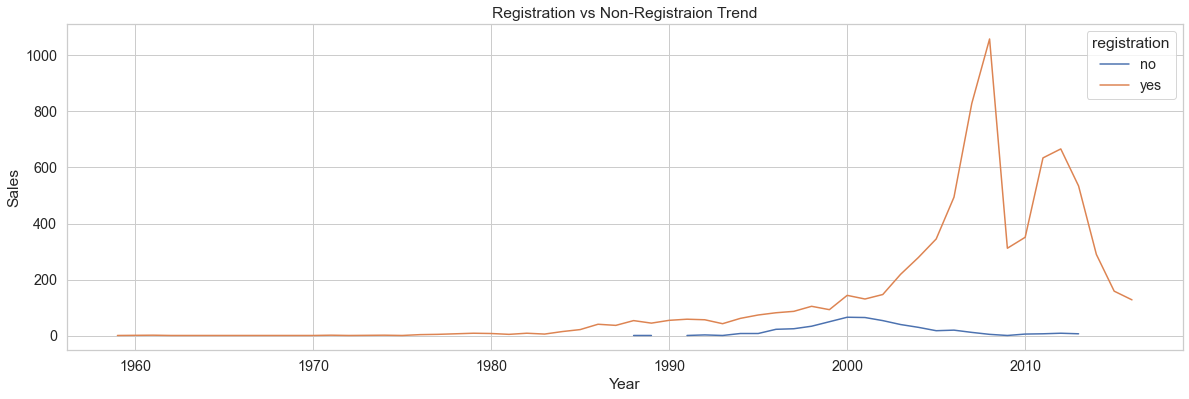

In [52]:
fig,ax = plt.subplots(figsize=(20,6))
df1.groupby(['year','registration']).count()['car'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Registration vs Non-Registraion Trend')

- 1993-2001 is the period we can see steep rise in the non-registration of cars vis a vis sales
- 2002 onwards the trend of non-registration has declined.
- In the last three years there has been no reported case of non-registration of new cars purchased.

<a id=section610></a>
## 6.10 Body Vs Price

Text(0.5, 1.0, 'Body vs Price')

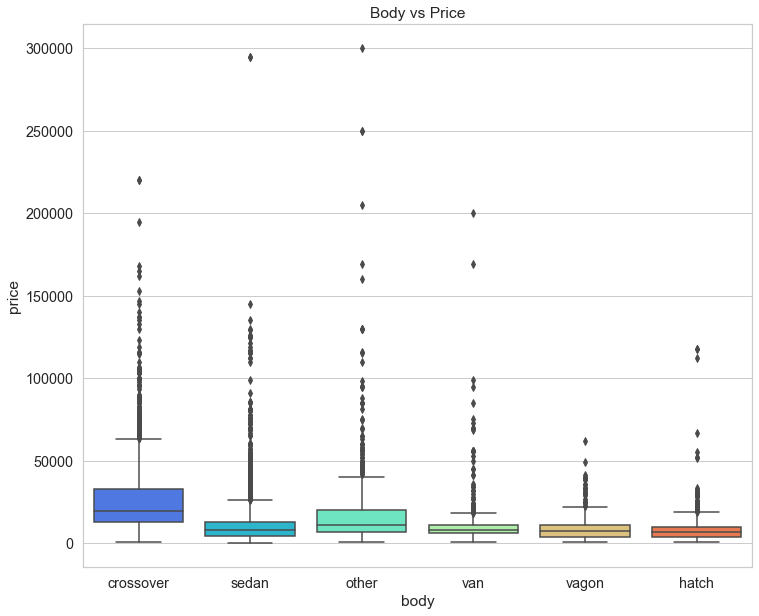

In [173]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df1, x='body', y='price', palette='rainbow')

plt.title('Body vs Price')

- Popularity of Sedan over years can be attributed to competitive pricing vis a vis other body types
- Crossovers are twice expensive than Sedan on an average

<a id=section611></a>
## 6.11 Correlation analysis by pair plot

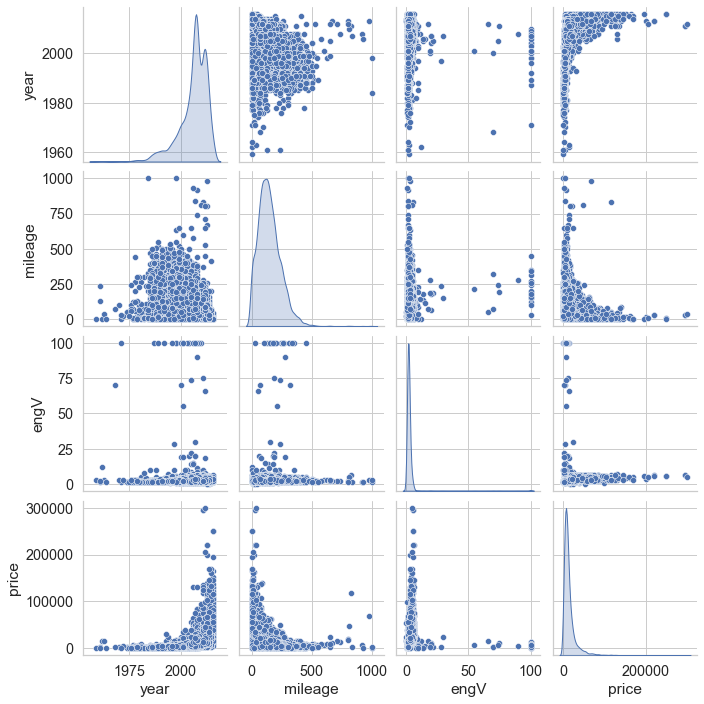

In [152]:
sns.pairplot(data=df1[['year', 'mileage', 'engV', 'price']], size=2.5, diag_kind='kde')

- There is **no strong corelation** between the given four **variables**
- **Year** and **Price** shows moderate positive correlation while **year** and **mileage** has moderate negative correlation

<a id=section612></a>
## 6.12 Correlation using Heat Map


<AxesSubplot:>

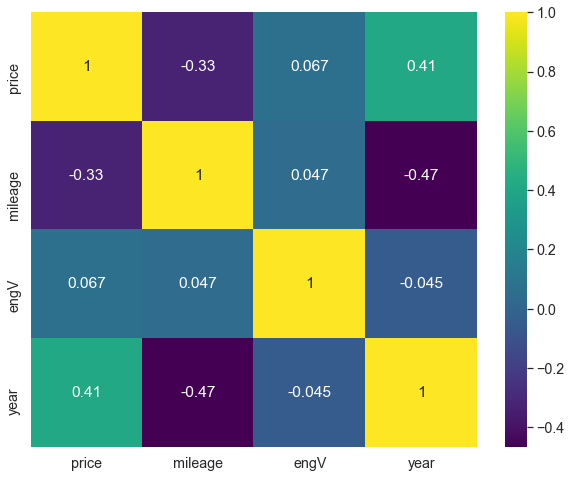

In [154]:
corr_mat = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

-  Year and Price have moderate positive correlation. That means with every passing year there has been an increase in the car prices.
-  Year and mileage have moderate negative correlation. That means there has been no impact of mileage on the car sales. Our previous analysis also corroborate the same.

<a id=section7></a>
# 7. Conclusion

- Sedan is most preferred car followed by crossover and hatch.
- Crossover and hatch has less mileage than other body types.
- Best mileage is being offered by Van and Vagon, which sells the least.
- Sedan has been popular over years due to its competitive pricing vis a vis other body types.
- Crossovers are twice as expensive as Sedans, but the sales is catching up with Sedan.
- Customers prefer all the fuel types across body type. 
- Petrol is the most preferred fuel type followed by diesel and gas.
- Petrol cars are more preferred irrespective of low mileage compared to diesel and gas cars.
- Front Wheel Drive is most preferred technology across body type, except crossover which is more popular with Full Wheel Drive.
- Non-Registration of cars is a passe. Customers are now registering their new cars.

<a id=section8></a>
# 8. Actionable Insights

- Trend of Crossover has caught up as a promising segment for manufacturers.
- Car manufacturers should focus to launch more crossover models apart from Sedan line-up.
- Crossovers need to be competitively priced for higher sales growth and bigger market share than Sedan.
- Price sensitive Sedan customers will switch to Crossover with affordable options.
- Current generation Customers are looking for performance and off-roading capabilities.
- Manufacturers have to offer cars models with all the fuel options specially with petrol, diesel and gas.
- Mileage is not an important criteria for customers when it comes to car buying. So manufacturers focus should be more on performance and features.

Additionally, before performing further analysis it would be prudent to collect more data on variables like customer location (rural, urban, semi-urban), usage (daily, weekends), passenger (solo, family), driven by (self, driver), age, gender, registration (private vs commercial), car specification and features, etc to have better customer insights.